<a href="https://colab.research.google.com/github/Bugnico/Modelos1PruebasSaberPro/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle
!chmod 600 ./kaggle.json


usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: the following arguments are required: command


In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

In [ ]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,904256,645256,308367,470353,989032,659872,47159,11829,257869,465511
PERIODO,20212,20212,20203,20195,20212,20203,20183,20183,20212,20183
ESTU_PRGM_ACADEMICO,ENFERMERIA,DERECHO,MERCADEO Y PUBLICIDAD,ADMINISTRACION DE EMPRESAS,PSICOLOGIA,MEDICINA VETERINARIA,INGENIERIA MECANICA,ADMINISTRACIÓN EN SALUD OCUPACIONAL,INGENIERIA INDUSTRIAL,ADMINISTRACION DE EMPRESAS
ESTU_PRGM_DEPARTAMENTO,BOGOTÁ,ATLANTICO,BOGOTÁ,SANTANDER,ANTIOQUIA,ANTIOQUIA,HUILA,BOGOTÁ,ATLANTICO,ANTIOQUIA
ESTU_VALORMATRICULAUNIVERSIDAD,Entre 5.5 millones y menos de 7 millones,Entre 2.5 millones y menos de 4 millones,Entre 2.5 millones y menos de 4 millones,Entre 4 millones y menos de 5.5 millones,Entre 2.5 millones y menos de 4 millones,Más de 7 millones,Entre 2.5 millones y menos de 4 millones,Entre 1 millón y menos de 2.5 millones,Entre 5.5 millones y menos de 7 millones,Entre 2.5 millones y menos de 4 millones
ESTU_HORASSEMANATRABAJA,Menos de 10 horas,0,Más de 30 horas,0,Entre 21 y 30 horas,Menos de 10 horas,Entre 21 y 30 horas,Entre 11 y 20 horas,Menos de 10 horas,Más de 30 horas
FAMI_ESTRATOVIVIENDA,Estrato 3,Estrato 3,Estrato 3,Estrato 4,Estrato 3,Estrato 5,Estrato 2,Estrato 2,Estrato 1,Estrato 5
FAMI_TIENEINTERNET,Si,No,Si,Si,Si,Si,Si,Si,Si,Si
FAMI_EDUCACIONPADRE,Técnica o tecnológica incompleta,Técnica o tecnológica completa,Secundaria (Bachillerato) completa,No sabe,Primaria completa,Educación profesional completa,Educación profesional incompleta,Primaria incompleta,Secundaria (Bachillerato) completa,Postgrado
FAMI_TIENELAVADORA,Si,Si,Si,Si,Si,Si,Si,Si,Si,Si


In [ ]:
train.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [ ]:
train.shape

(692500, 21)

In [ ]:
train.info(False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Columns: 21 entries, ID to coef_4
dtypes: float64(4), int64(2), object(15)
memory usage: 111.0+ MB


In [ ]:
train.isin([np.nan, np.inf, -np.inf]).sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773


In [ ]:

print(train['RENDIMIENTO_GLOBAL'].unique())


['medio-alto' 'bajo' 'alto' 'medio-bajo']


¿Qué significa los coef_ en mi dataset?

              coef_1         coef_2         coef_3         coef_4
count  692500.000000  692500.000000  692500.000000  692500.000000
mean        0.268629       0.259996       0.262087       0.262903
std         0.122130       0.093480       0.058862       0.067944
min         0.000000       0.000000       0.000000       0.000000
25%         0.203000       0.212000       0.254000       0.255000
50%         0.240000       0.271000       0.276000       0.285000
75%         0.314000       0.309000       0.293000       0.303000
max         0.657000       0.487000       0.320000       0.332000

Correlation Matrix:
          coef_1    coef_2    coef_3    coef_4
coef_1  1.000000 -0.420428  0.401190 -0.179439
coef_2 -0.420428  1.000000  0.356097  0.821443
coef_3  0.401190  0.356097  1.000000  0.726692
coef_4 -0.179439  0.821443  0.726692  1.000000


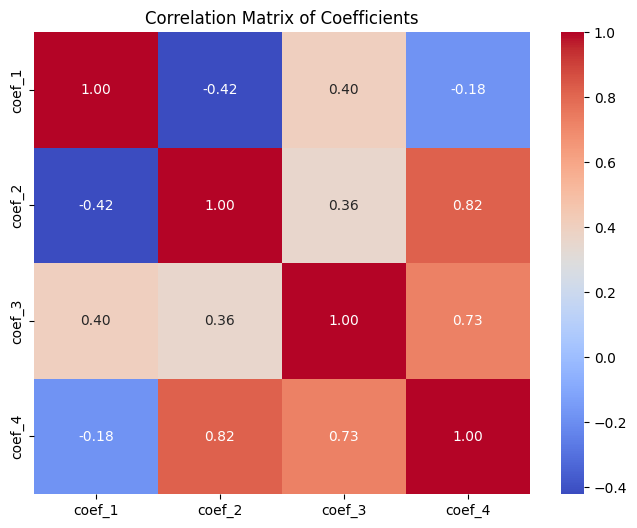

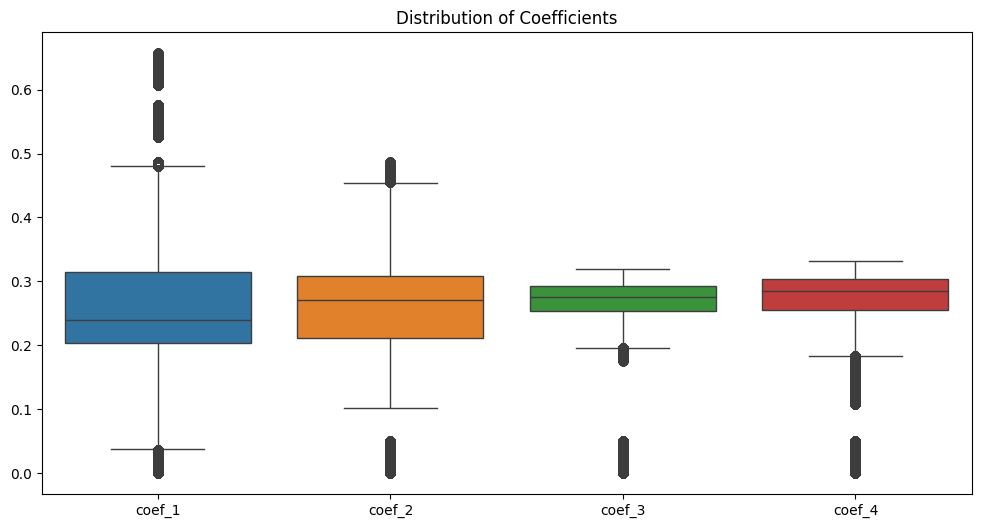

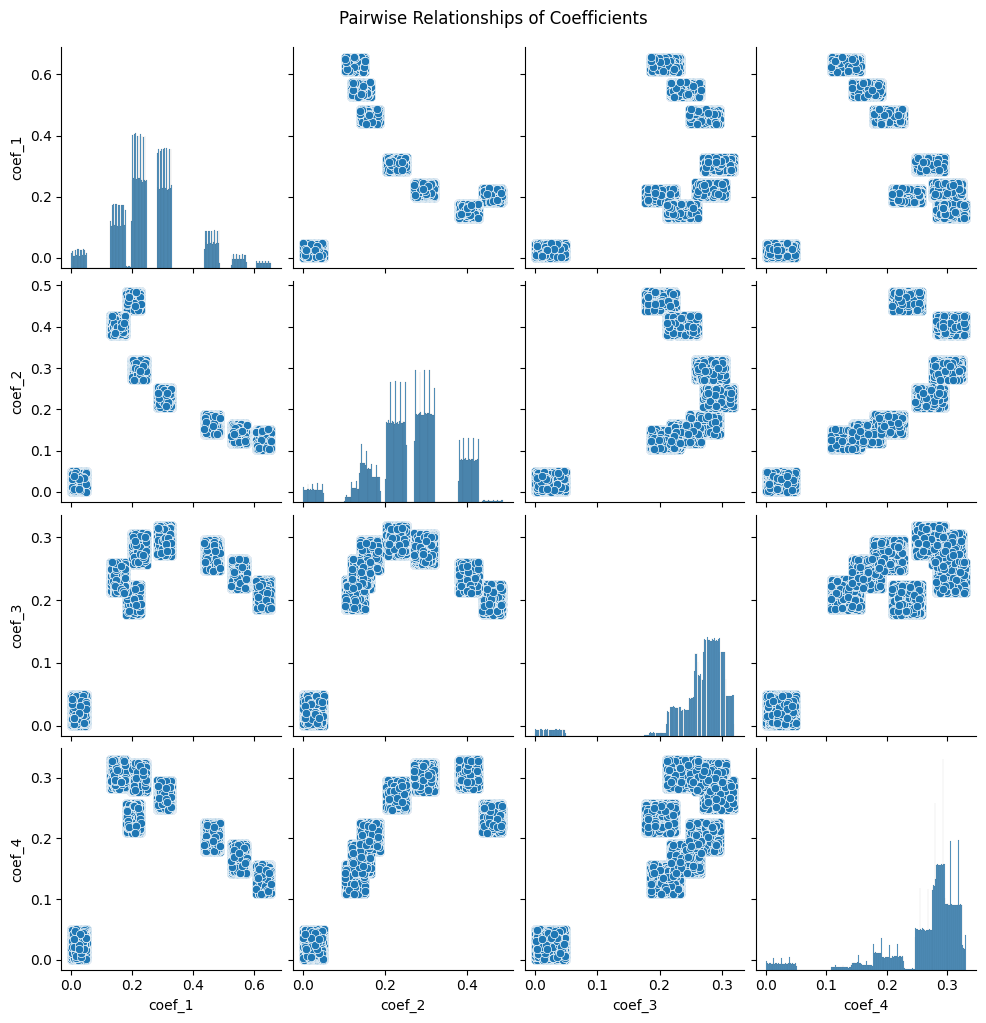

In [ ]:
columns_to_compare = ['coef_1', 'coef_2', 'coef_3', 'coef_4']
for col in columns_to_compare:
    train[col] = pd.to_numeric(train[col], errors='coerce')


# Calculate descriptive statistics
description = train[columns_to_compare].describe()
print(description)


# correlation matrix
correlation_matrix = train[columns_to_compare].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Coefficients')
plt.show()

# Box plots for distribution comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=train[columns_to_compare])
plt.title('Distribution of Coefficients')
plt.show()


# Pairplot for pairwise relationships
sns.pairplot(train[columns_to_compare])
plt.suptitle('Pairwise Relationships of Coefficients', y=1.02)
plt.show()





Alta correlación entre las variables.

Estadísticas descriptivas:
              coef_1         coef_2         coef_3         coef_4
count  692500.000000  692500.000000  692500.000000  692500.000000
mean        0.268629       0.259996       0.262087       0.262903
std         0.122130       0.093480       0.058862       0.067944
min         0.000000       0.000000       0.000000       0.000000
25%         0.203000       0.212000       0.254000       0.255000
50%         0.240000       0.271000       0.276000       0.285000
75%         0.314000       0.309000       0.293000       0.303000
max         0.657000       0.487000       0.320000       0.332000


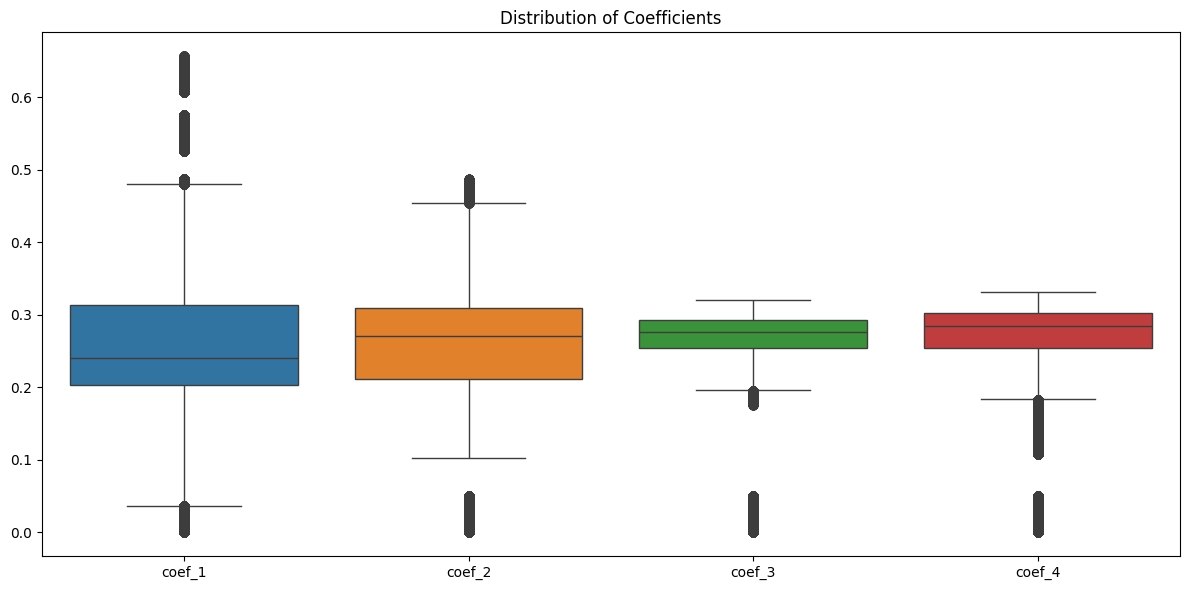

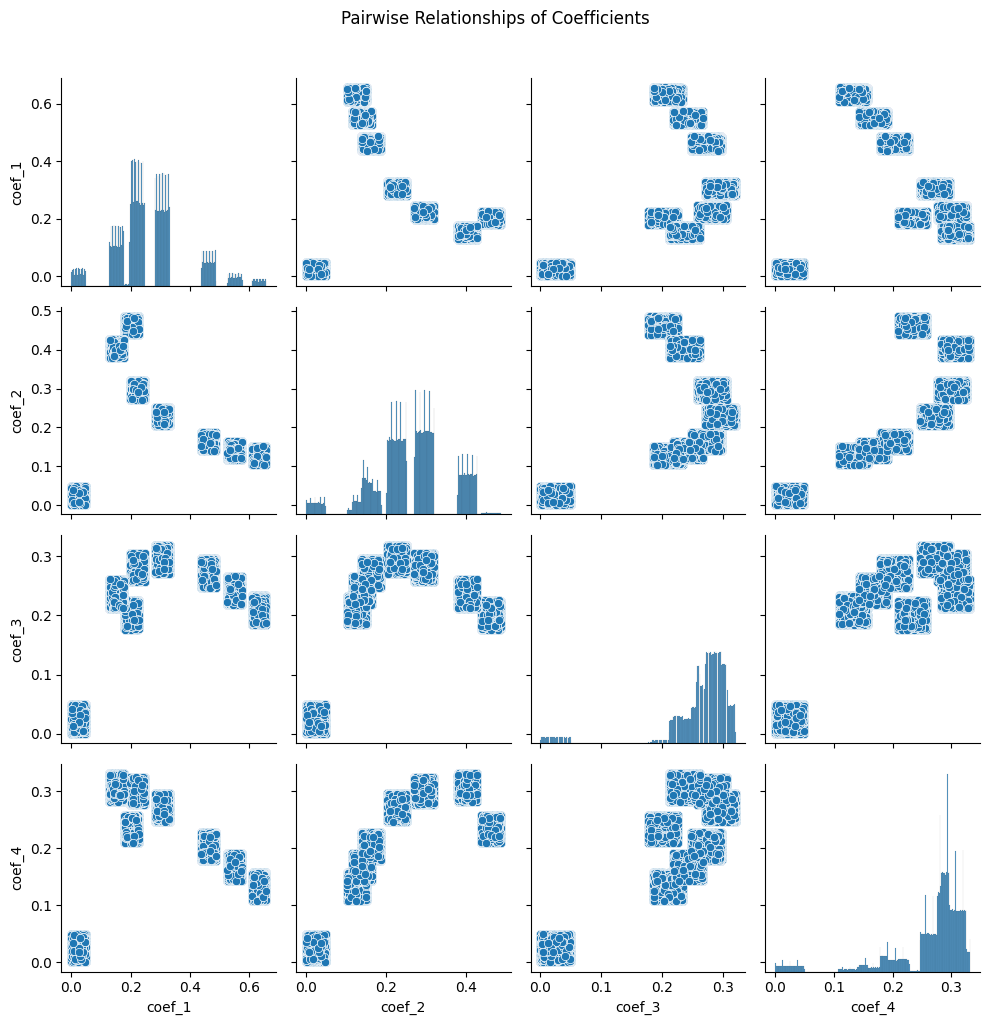

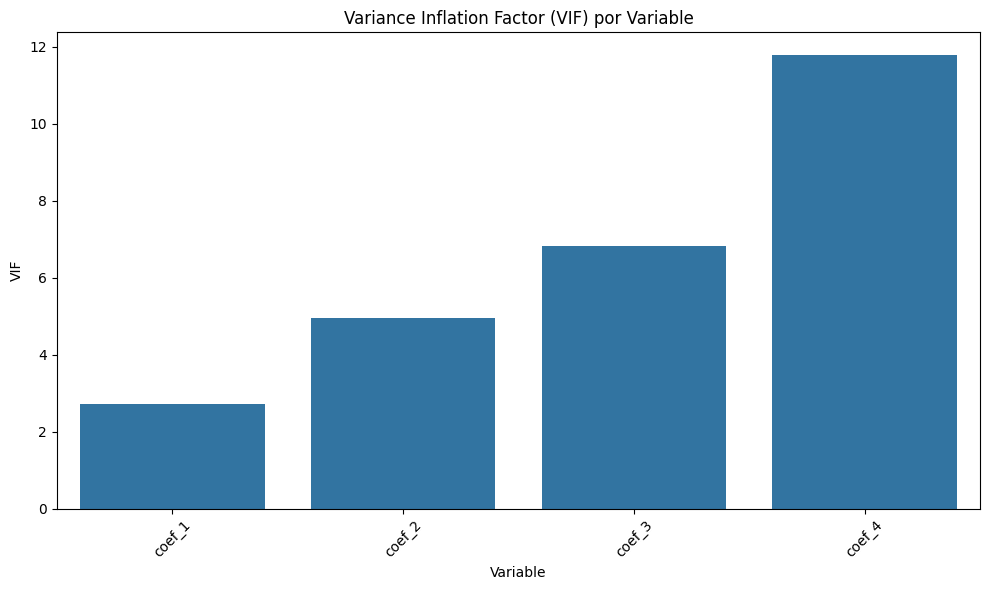

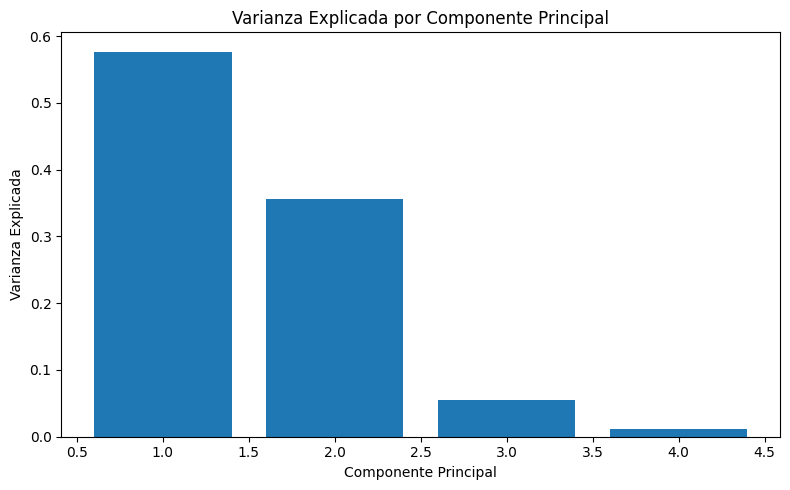

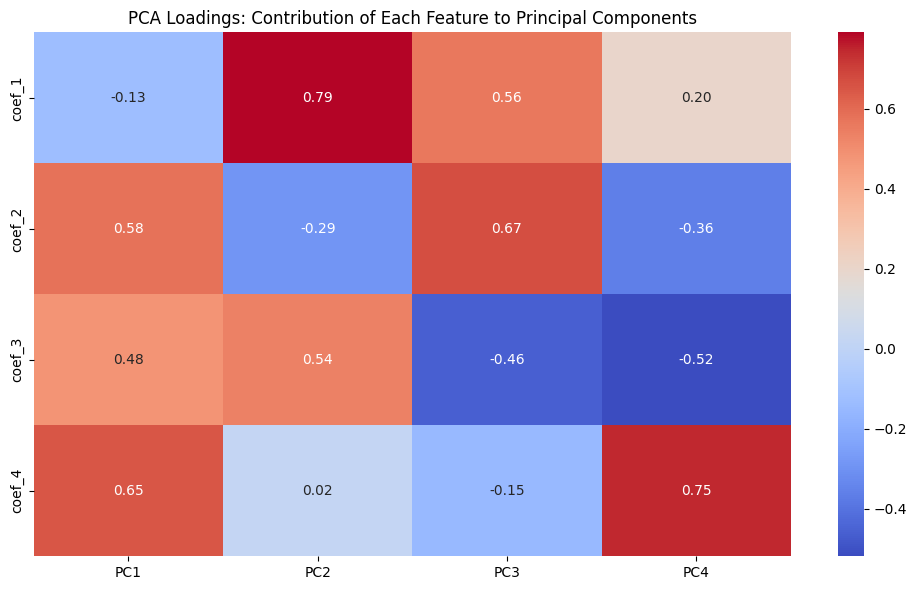

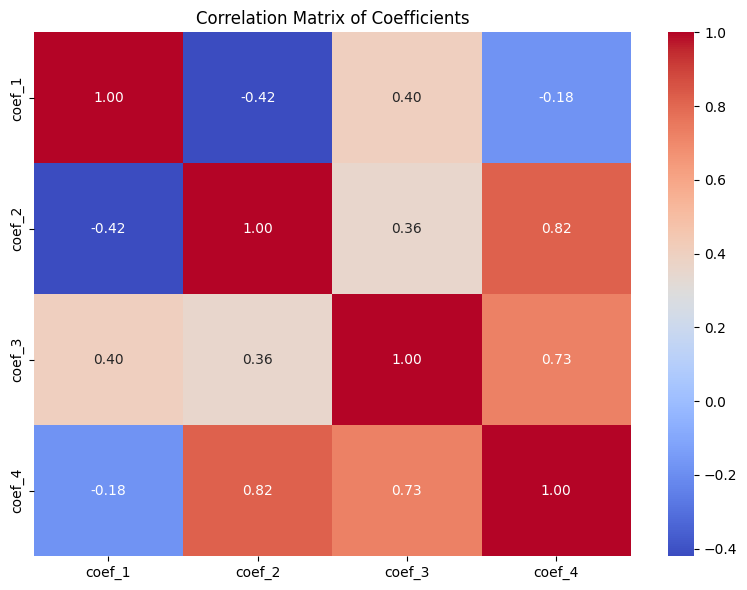


Matriz de correlación:
          coef_1    coef_2    coef_3    coef_4
coef_1  1.000000 -0.420428  0.401190 -0.179439
coef_2 -0.420428  1.000000  0.356097  0.821443
coef_3  0.401190  0.356097  1.000000  0.726692
coef_4 -0.179439  0.821443  0.726692  1.000000

Factores de inflación de varianza (VIF):
  Variable        VIF
0   coef_1   2.710113
1   coef_2   4.942846
2   coef_3   6.818327
3   coef_4  11.789607

Varianza explicada por los componentes principales:
[0.57666463 0.35595586 0.05524335 0.01213616]

Featuras a eliminar por alta correlación:
['coef_2']

Se han creado 3 componentes principales


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_regression

def load_and_preprocess(filepath, columns):
    df = pd.read_csv(filepath)
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def analyze_correlations(df, columns):
    correlation_matrix = df[columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Coefficients')
    plt.tight_layout()
    plt.show()
    return correlation_matrix

def calculate_vif(df, columns):
    X = df[columns].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    vif_data = pd.DataFrame()
    vif_data["Variable"] = columns
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    return vif_data

def apply_pca(df, columns, n_components=None):
    X = df[columns].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(X_scaled)

    column_names = [f'PC{i+1}' for i in range(principal_components.shape[1])]
    pc_df = pd.DataFrame(data=principal_components, columns=column_names)

    explained_variance = pca.explained_variance_ratio_
    loadings = pd.DataFrame(
        data=pca.components_.T,
        columns=column_names,
        index=columns
    )

    return pc_df, explained_variance, loadings, pca

def feature_selection_univariate(df, X_columns, y_column, k=3):
    X = df[X_columns].dropna()
    y = df[y_column].loc[X.index]

    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)

    scores = pd.DataFrame({
        'Feature': X_columns,
        'Score': selector.scores_
    }).sort_values(by='Score', ascending=False)

    selected_features = [X_columns[i] for i in selector.get_support(indices=True)]

    return scores, selected_features

def remove_lowest_importance(df, columns, correlation_threshold=0.8):
    corr_matrix = df[columns].corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = []
    for column in upper_tri.columns:
        if any(upper_tri[column] > correlation_threshold):
            correlated_vars = upper_tri.index[upper_tri[column] > correlation_threshold].tolist()
            avg_corr = []
            for var in correlated_vars + [column]:
                avg_corr.append(corr_matrix[var].mean())

            if avg_corr[-1] == max(avg_corr):
                to_drop.extend(correlated_vars)
            else:
                to_drop.append(column)

    to_drop = list(set(to_drop))
    return to_drop

def ridge_regression_cv(df, X_columns, y_column, alphas=np.logspace(-4, 4, 20)):
    from sklearn.linear_model import RidgeCV
    from sklearn.model_selection import KFold

    X = df[X_columns].dropna()
    y = df[y_column].loc[X.index]

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    ridge_cv = RidgeCV(alphas=alphas, cv=cv, scoring='neg_mean_squared_error')
    ridge_cv.fit(X, y)

    return ridge_cv

def lasso_feature_selection(df, X_columns, y_column, alphas=np.logspace(-4, 0, 50)):
    from sklearn.linear_model import LassoCV
    from sklearn.model_selection import KFold

    X = df[X_columns].dropna()
    y = df[y_column].loc[X.index]

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    lasso_cv = LassoCV(alphas=alphas, cv=cv, max_iter=10000, random_state=42)
    lasso_cv.fit(X, y)

    feature_importance = pd.DataFrame({
        'Feature': X_columns,
        'Coefficient': lasso_cv.coef_
    })
    feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

    selected_features = feature_importance[feature_importance['Coefficient'] != 0]['Feature'].tolist()

    return lasso_cv, feature_importance, selected_features

def evaluate_multicollinearity(df, columns):
    results = {}

    correlation_matrix = analyze_correlations(df, columns)
    results['correlation_matrix'] = correlation_matrix

    vif_data = calculate_vif(df, columns)
    results['vif_data'] = vif_data

    pc_df, explained_variance, loadings, pca = apply_pca(df, columns)
    results['pca_variance'] = explained_variance
    results['pca_loadings'] = loadings
    results['pca_model'] = pca

    to_drop = remove_lowest_importance(df, columns)
    results['features_to_drop'] = to_drop
    results['features_to_keep'] = [col for col in columns if col not in to_drop]

    return results

def visualize_multicollinearity(df, columns):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[columns])
    plt.title('Distribution of Coefficients')
    plt.tight_layout()
    plt.show()

    sns.pairplot(df[columns])
    plt.suptitle('Pairwise Relationships of Coefficients', y=1.02)
    plt.tight_layout()
    plt.show()

    vif_data = calculate_vif(df, columns)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Variable', y='VIF', data=vif_data)
    plt.title('Variance Inflation Factor (VIF) por Variable')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    pc_df, explained_variance, loadings, pca = apply_pca(df, columns)
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance)
    plt.xlabel('Componente Principal')
    plt.ylabel('Varianza Explicada')
    plt.title('Varianza Explicada por Componente Principal')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('PCA Loadings: Contribution of Each Feature to Principal Components')
    plt.tight_layout()
    plt.show()

def process_multicollinearity(df, columns, y_column=None, method='pca', target_variance=0.95):
    if method == 'pca':
        X = df[columns].dropna()
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        pca = PCA(n_components=target_variance)
        principal_components = pca.fit_transform(X_scaled)

        column_names = [f'PC{i+1}' for i in range(principal_components.shape[1])]
        pc_df = pd.DataFrame(data=principal_components, columns=column_names, index=X.index)

        result_df = df.copy()
        for col in column_names:
            result_df.loc[pc_df.index, col] = pc_df[col]

        return result_df, pca

    elif method == 'vif_elimination':
        threshold = 10
        current_columns = columns.copy()
        result_df = df.copy()

        while True:
            vif_data = calculate_vif(result_df, current_columns)
            max_vif = vif_data['VIF'].max()

            if max_vif < threshold:
                break

            max_vif_feature = vif_data.loc[vif_data['VIF'] == max_vif, 'Variable'].values[0]
            current_columns.remove(max_vif_feature)

        return result_df[current_columns], current_columns

    elif method == 'feature_selection' and y_column:
        scores, selected_features = feature_selection_univariate(df, columns, y_column)
        return df[selected_features], selected_features

    elif method == 'lasso' and y_column:
        lasso_cv, feature_importance, selected_features = lasso_feature_selection(df, columns, y_column)
        return df[selected_features], selected_features

    elif method == 'correlation':
        to_drop = remove_lowest_importance(df, columns)
        keep_columns = [col for col in columns if col not in to_drop]
        return df[keep_columns], keep_columns

    else:
        return df[columns], columns

# Función principal que integra todos los pasos
def handle_multicollinearity(filepath, columns, y_column=None, method='pca'):
    df = load_and_preprocess(filepath, columns)

    print("Estadísticas descriptivas:")
    print(df[columns].describe())

    visualize_multicollinearity(df, columns)

    analysis_results = evaluate_multicollinearity(df, columns)

    print("\nMatriz de correlación:")
    print(analysis_results['correlation_matrix'])

    print("\nFactores de inflación de varianza (VIF):")
    print(analysis_results['vif_data'])

    print("\nVarianza explicada por los componentes principales:")
    print(analysis_results['pca_variance'])

    print("\nFeaturas a eliminar por alta correlación:")
    print(analysis_results['features_to_drop'])

    processed_df, result = process_multicollinearity(df, columns, y_column, method)

    if method == 'pca':
        print(f"\nSe han creado {len(processed_df.filter(like='PC').columns)} componentes principales")
    else:
        print(f"\nFeatures seleccionadas: {result}")

    return processed_df, analysis_results, result

# Ejemplo de uso
if __name__ == "__main__":
    filepath = 'train.csv'
    columns_to_compare = ['coef_1', 'coef_2', 'coef_3', 'coef_4']

    # Para un problema de regresión donde queremos predecir 'target_column'
    processed_df, analysis, result = handle_multicollinearity(
        filepath,
        columns_to_compare,
        y_column='target_column',  # Reemplazar con el nombre real de la columna objetivo
        method='pca'  # Opciones: 'pca', 'vif_elimination', 'feature_selection', 'lasso', 'correlation'
    )

In [ ]:
def codificar_rendimiento_global_mejorado(df, column_name='RENDIMIENTO_GLOBAL'):
    """
    Codifica la columna RENDIMIENTO_GLOBAL con valores numéricos
    según una escala ordinal personalizada, con visualización optimizada.
    """
    # Definimos el mapeo personalizado según el orden natural
    mapping = {
        'bajo': 0.1,       # El nivel más bajo
        'medio-bajo': 0.33, # Entre bajo y medio
        'medio-alto': 0.67, # Entre medio y alto
        'alto': 1.0        # El nivel más alto
    }

    # Creamos una copia del dataframe para no modificar el original
    df_encoded = df.copy()

    # Aplicamos el mapeo para crear la nueva columna
    df_encoded['RENDIMIENTO_GLOBAL_NUM'] = df[column_name].map(mapping)

    # Verificamos que no haya valores nulos tras el mapeo
    missing = df_encoded.loc[df_encoded['RENDIMIENTO_GLOBAL_NUM'].isna(), column_name].unique()
    if len(missing) > 0:
        print(f"¡Advertencia! Los siguientes valores no se pudieron mapear: {missing}")

    # Mostramos el mapeo realizado
    print("Mapeo de RENDIMIENTO_GLOBAL a valores numéricos:")
    for categoria, valor in mapping.items():
        print(f"  {categoria} -> {valor}")

    # Obtenemos las cuentas para normalizar los tamaños
    counts = df[column_name].value_counts()
    max_count = counts.max()

    # Visualizamos la distribución en dos gráficos separados para mejor visualización
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # Gráfico de barras para categorías
    order = ['bajo', 'medio-bajo', 'medio-alto', 'alto']  # Orden natural para visualización
    counts_ordered = counts.reindex(order)

    ax1 = axes[0]
    sns.barplot(x=counts_ordered.index, y=counts_ordered.values, ax=ax1)
    ax1.set_title('Distribución de categorías de RENDIMIENTO_GLOBAL')
    ax1.set_ylabel('Frecuencia')

    # Añadimos etiquetas con el valor exacto sobre cada barra
    for i, count in enumerate(counts_ordered):
        ax1.text(i, count + 0.5, str(count), ha='center')

    # Gráfico de dispersión para mostrar la relación, con escala normalizada
    ax2 = axes[1]
    colors = ['blue', 'green', 'orange', 'red']  # Colores distintos para cada categoría

    for i, (categoria, valor) in enumerate(sorted(mapping.items(), key=lambda x: x[1])):
        if categoria in counts:
            count = counts[categoria]
            # Normalizamos el tamaño para que sea visible pero no excesivo
            size = min(5000, 200 + (count / max_count) * 2000)
            ax2.scatter(valor, 0, s=size, label=f"{categoria} ({count})", color=colors[i], alpha=0.7)

    # Configuramos el eje X para que cubra todo el rango e incluya marcas en los valores de mapeo
    ax2.set_xlim(0, 1.1)
    ax2.set_xticks(list(mapping.values()))
    ax2.set_xticklabels([f"{k} ({v})" for k, v in mapping.items()])

    # Eliminamos los ticks del eje Y ya que no tiene significado en este contexto
    ax2.set_yticks([])

    # Añadimos una línea en y=0 para mejor visualización
    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.3)

    ax2.set_xlabel('Valor numérico codificado')
    ax2.set_title('Codificación numérica de RENDIMIENTO_GLOBAL')
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)

    plt.tight_layout()
    plt.show()

    # Visualización alternativa: gráfico de barras horizontal para la codificación
    plt.figure(figsize=(10, 6))
    for i, (categoria, valor) in enumerate(sorted(mapping.items(), key=lambda x: x[1])):
        plt.barh(i, valor, height=0.5, color=colors[i], alpha=0.7)
        plt.text(valor + 0.02, i, f"{valor} ({categoria})", va='center')

    plt.yticks(range(len(mapping)), list(mapping.keys()))
    plt.xlim(0, 1.1)
    plt.title('Escala numérica para RENDIMIENTO_GLOBAL')
    plt.xlabel('Valor codificado')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return df_encoded, mapping

Mapeo de RENDIMIENTO_GLOBAL a valores numéricos:
  bajo -> 0.1
  medio-bajo -> 0.33
  medio-alto -> 0.67
  alto -> 1.0


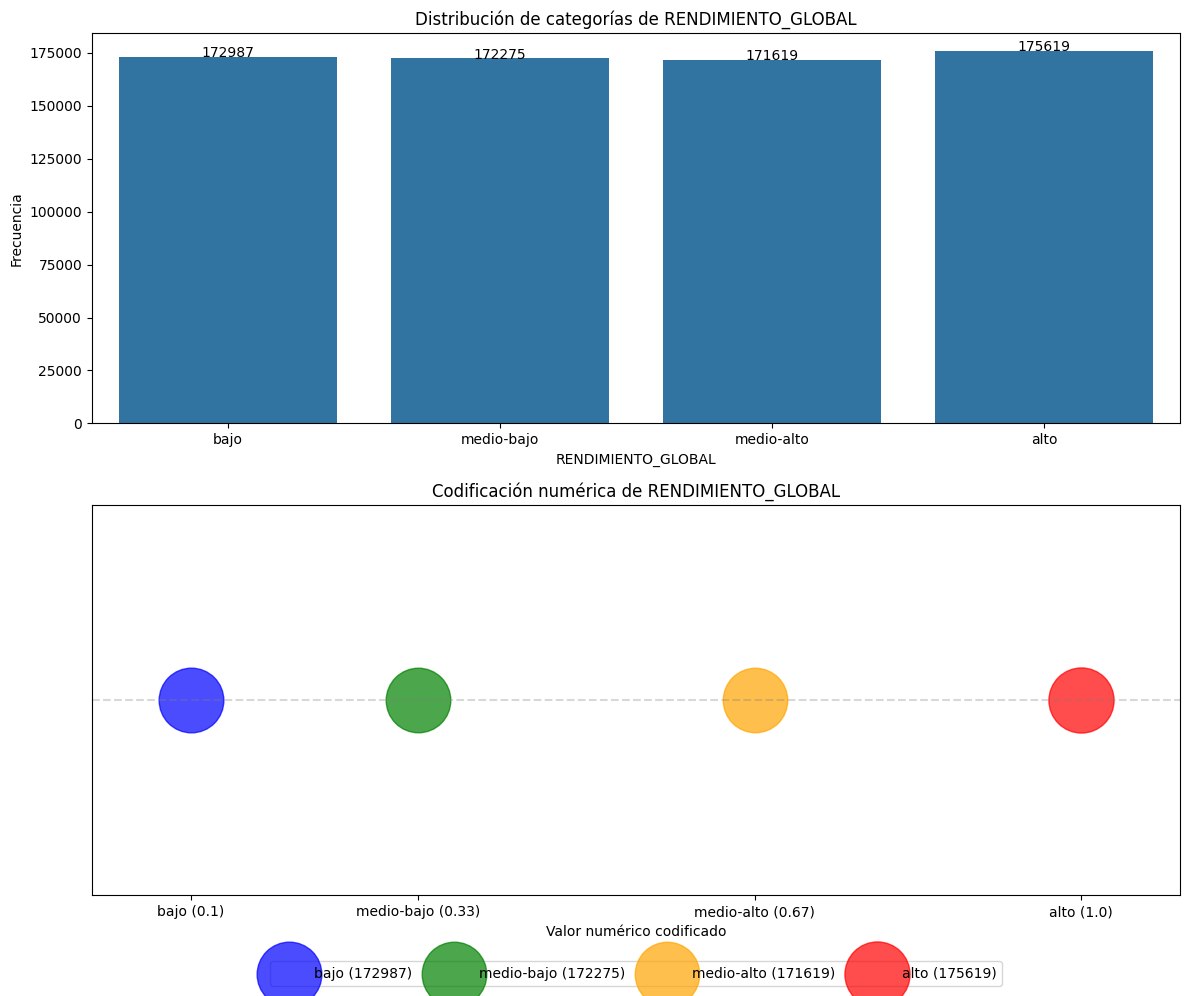

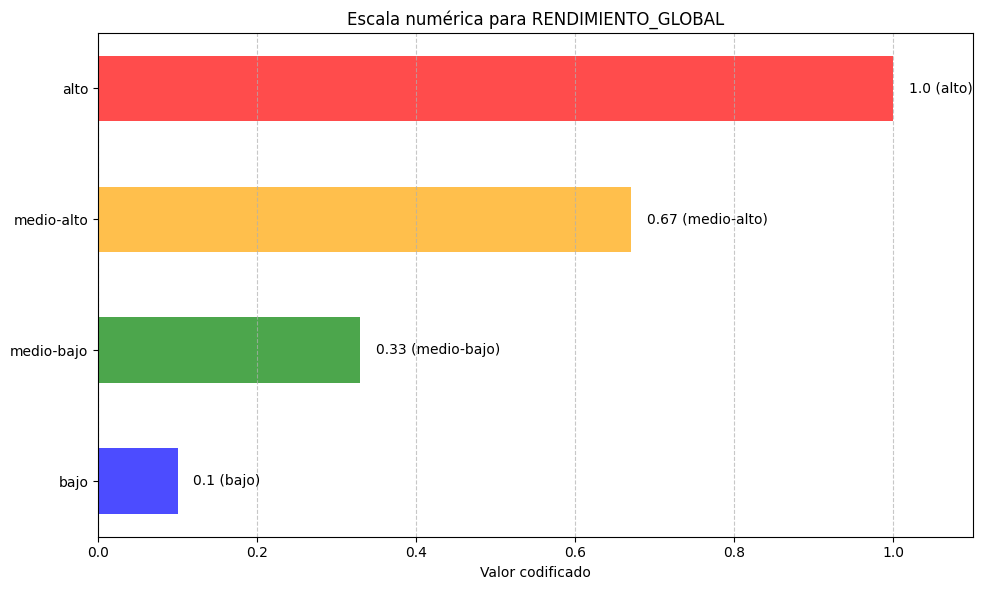

(            ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
 0       904256    20212                           ENFERMERIA   
 1       645256    20212                              DERECHO   
 2       308367    20203                MERCADEO Y PUBLICIDAD   
 3       470353    20195           ADMINISTRACION DE EMPRESAS   
 4       989032    20212                           PSICOLOGIA   
 ...        ...      ...                                  ...   
 692495   25096    20195                             BIOLOGIA   
 692496  754213    20212                           PSICOLOGIA   
 692497  504185    20183  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
 692498  986620    20195                           PSICOLOGIA   
 692499  933374    20195                           PSICOLOGIA   
 
        ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD  \
 0                      BOGOTÁ  Entre 5.5 millones y menos de 7 millones   
 1                   ATLANTICO  Entre 2.5 millones y menos de 4 mi

In [ ]:
codificar_rendimiento_global_mejorado(train)